# **Importing the libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# **Importing the dataset**

In [ ]:
dataset = pd.read_csv('Old_Housing_Campaign.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# **Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)

# **Fitting Regression to the Training Set**

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_sc, y)

LogisticRegression(random_state=0)

# **Visualizing the Training Set results**

<ipython-input-20-6c87ed2178c6>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1], c= ListedColormap(('red','blue'))(i) ,label= j)


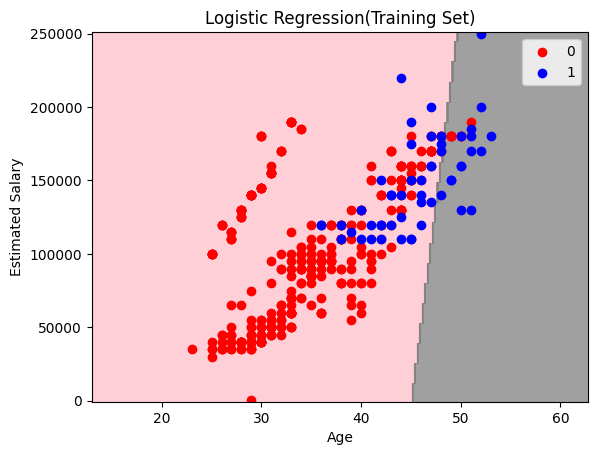

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_sc), y
X1,X2 = np.meshgrid(np.arange(start =X_set[:, 0].min() -10, stop=X_set[:, 0].max()+10, step = 0.25),
                    np.arange(start =X_set[:, 1].min() -1000, stop=X_set[:, 1].max()+1000, step = 0.25))
plt.contourf(X1,X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),alpha=0.75,
             cmap = ListedColormap(('pink','gray')))
plt.xlim((X1.min(),X1.max()))
plt.ylim((X2.min(),X2.max()))
for i,j in enumerate(np.unique(y_set)):
     plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1], c= ListedColormap(('red','blue'))(i) ,label= j)
plt.title('Logistic Regression(Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# **Lets apply our train model to new dataset**
# **Start with Importing Target dataset**

Text(0, 0.5, 'Estimated Salary')

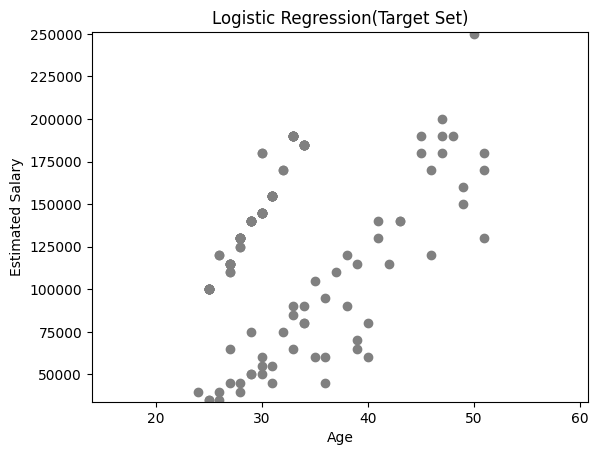

In [ ]:
target_dataset = pd.read_csv('New_Target_Customers.csv')
X_project = target_dataset.iloc[:, :].values
X_set = X_project
X1,X2 = np.meshgrid(np.arange(start =X_set[:, 0].min() -10, stop=X_set[:, 0].max()+10, step = 0.25),
                    np.arange(start =X_set[:, 1].min() -1000, stop=X_set[:, 1].max()+1000, step = 0.25))
plt.xlim((X1.min(),X1.max()))
plt.ylim((X2.min(),X2.max()))
plt.scatter(X_set[:, 0], X_set[:, 1], c = 'gray' )
plt.title('Logistic Regression(Target Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')

# **Apply model here**

In [ ]:
X_project_sc = sc.transform(X_project)
y_project_pred = classifier.predict(X_project_sc)

# **Visualizing Target Customers**

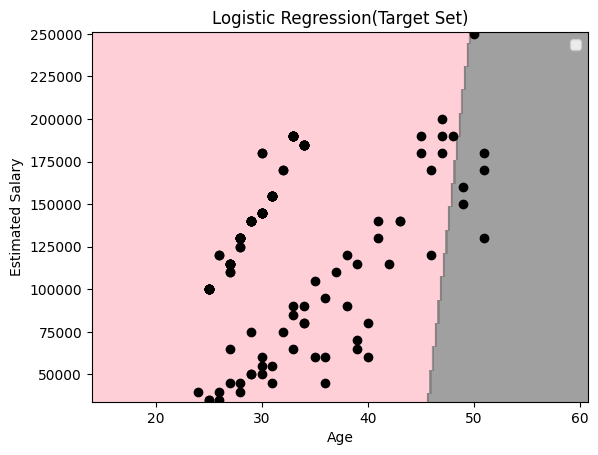

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_project_sc), y_project_pred
X1,X2 = np.meshgrid(np.arange(start =X_set[:, 0].min() -10, stop=X_set[:, 0].max()+10, step = 0.25),
                    np.arange(start =X_set[:, 1].min() -1000, stop=X_set[:, 1].max()+1000, step = 0.25))
plt.contourf(X1,X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),alpha=0.75,
             cmap = ListedColormap(('pink','gray')))
plt.xlim((X1.min(),X1.max()))
plt.ylim((X2.min(),X2.max()))
plt.scatter(X_set[:, 0], X_set[:, 1], c = 'black' )
plt.title('Logistic Regression(Target Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()